## Naive Bayes - Text Data

Within this tab I am running a naive bayes algorithm on text data extracted from reddit. The ultimate goal of this is to train a model to explore whether reddit posts regarding ocean sustainability and plastic pollution are good indicators of what sub reddit class they come from. 

The goal of this model is to help researchers gain insights into the prevalence of discussions related to ocean sustainability and plastic pollution across various subreddits as well as track trends and changes in the discussions related to ocean sustainability and plastic pollution over time.

### Prepping Data

Within the code chunk below I imported the text data gathered from the reddit api and cleaned it. I specifically removed punctuation, numbers and converted it all to lowercase. 

In [55]:
#| code-fold: true
import pandas as pd
import string
text_data = pd.read_csv('/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/codes/01-data-gathering/reddit_data_final.csv')
def remove_punctuation_and_numbers(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    text = ''.join(char for char in text if not char.isdigit())
    text = text.lower()
    return text
text_data['Title'] = text_data['Title'].apply(remove_punctuation_and_numbers)

Next, I encoded the subreddit column in order to prep the data for accurate modeling. The far right column is the encoded column. For example, the news class is encoded as 0. 

In [166]:
#| code-fold: true
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode the 'Subreddit' column
label_encoder = LabelEncoder()
text_data['Subreddit_encoded'] = label_encoder.fit_transform(text_data['Subreddit'])
text_data.head(5)

class_labels = label_encoder.classes_
encoded_values = label_encoder.transform(class_labels)

for label, value in zip(class_labels, encoded_values):
    print(f"Class: {label}, Encoded Value: {value}")

Class: news, Encoded Value: 0
Class: science, Encoded Value: 1
Class: technology, Encoded Value: 2
Class: travel, Encoded Value: 3
Class: worldnews, Encoded Value: 4


## Vectorization

Next, I applied the TF-IDF vectorization to the text data in the 'Title' column. This converted the text data into a numerical format based on the TF-IDF values for each word or term. I used this resource [here](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d) to help me better understand this concept. 

The length of this data is now 5 rows and 1824 columns.

In [128]:
#| code-fold: true
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Fit and transform the title column to get TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(text_data['Title'])

# Create a DataFrame from the TF-IDF features
tfidf_df = pd.DataFrame(data=tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine the TF-IDF DataFrame with the original DataFrame
result_df = pd.concat([text_data, tfidf_df], axis=1)
result_df.tail(5)

,Subreddit,Title,Subreddit_encoded,abl,abund,abyss,ac,academi,acceler,access,...,yearold,yearpacif,yet,yoerger,young,yr,zealand,zero,zone,zooplankton
494,travel,travel dominican republ stay away lifestyl pue...,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,travel,trip summari olymp nation park washington,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,travel,honeymoon review – dive trip philippin hong ko...,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,travel,best place see plastic island wast,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,travel,go vacat month question swim keep stuff dri,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting Data into Feature and Target Variables

This process is the same as what I completed with the record data. I split the dataset into feature and target variables. The target variable is the subreddits (technology, news, worldnews, science, travel).

In [136]:
#| code-fold: true

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = result_df.drop(['Subreddit', 'Subreddit_encoded', 'Title'], axis=1)  # Features
y = result_df['Subreddit_encoded']  # Target

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Training and Evaluating Model

Now I will train and evaulate the model. I will evaluate the model by looking at the training and testing accuracy and f1 scores. 

**Accuracy:** A performance metric used to evaluate the accuracy of a machine learning model on a test dataset

**F1:** Combines precision and recall. F1 = 2 × (Precision+Recall) / (Precision×Recall)

Training Accuracy: 0.76
Training F1 Score: 0.70
Testing Accuracy: 0.46
Testing F1 Score: 0.33


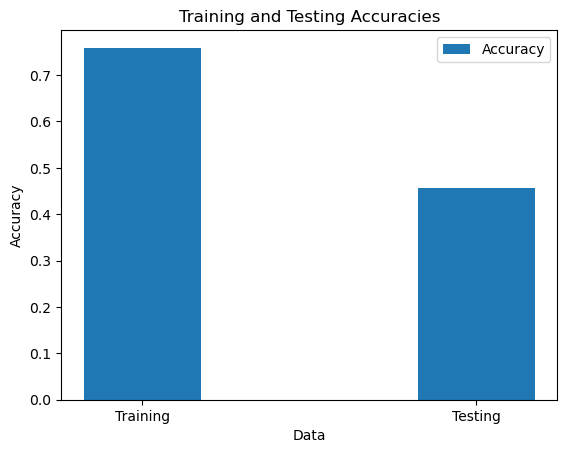

In [139]:
#| code-fold: true

from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Initialize and train a Multinomial Naive Bayes classifier on the training data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = nb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Make predictions on the testing data
y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training F1 Score: {train_f1:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print(f'Testing F1 Score: {test_f1:.2f}')

# Create labels and data for the bar graph
labels = ['Training', 'Testing']
accuracies = [train_accuracy, test_accuracy]

# Set the width of the bars
width = 0.35

# Create an array of indices to position the bars
x = np.arange(len(labels))

# Create the bar graph
plt.bar(x, accuracies, width, label='Accuracy')

# Add labels, a title, and a legend
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies')
plt.xticks(x, labels)
plt.legend()


Immediately, it is understood that the training accuracy is way higher than the testing accuracy. In an attempt to fix this feature selection must be completed. 

I tried many feature selection techniques and none were improoving the accuracy score. Rather than aimlessly continuing to try different feature selection methods I took a deep dive into what the current model was doing well. I did this through a confusion matrix. 

In [164]:
#| code-fold: true

from sklearn.feature_selection import SelectKBest, chi2
k = 690

# Initialize SelectKBest with the chi-squared (chi2) test as the scoring function
# You can choose a different scoring function depending on your data
feature_selector = SelectKBest(score_func=chi2, k=k)

# Fit the feature selector on the training data and transform the data
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Initialize and train a Multinomial Naive Bayes classifier on the selected features
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_selected, y_train)

# Make predictions on the training data with selected features
y_train_pred = nb_classifier.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Make predictions on the testing data with selected features
y_test_pred = nb_classifier.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Training Accuracy with Feature Selection: {train_accuracy:.2f}')
print(f'Training F1 Score with Feature Selection: {train_f1:.2f}')
print(f'Testing Accuracy with Feature Selection: {test_accuracy:.2f}')
print(f'Testing F1 Score with Feature Selection: {test_f1:.2f}')


Training Accuracy with Feature Selection: 0.75
Training F1 Score with Feature Selection: 0.69
Testing Accuracy with Feature Selection: 0.46
Testing F1 Score with Feature Selection: 0.32


Testing Accuracy with Feature Selection: 0.46
Testing F1 Score with Feature Selection: 0.32
Confusion Matrix:
[[  0   0   0   0  37]
 [  0   6   0   0  67]
 [  0   1   0   0  20]
 [  0   0   0   0   8]
 [  0   3   0   0 108]]


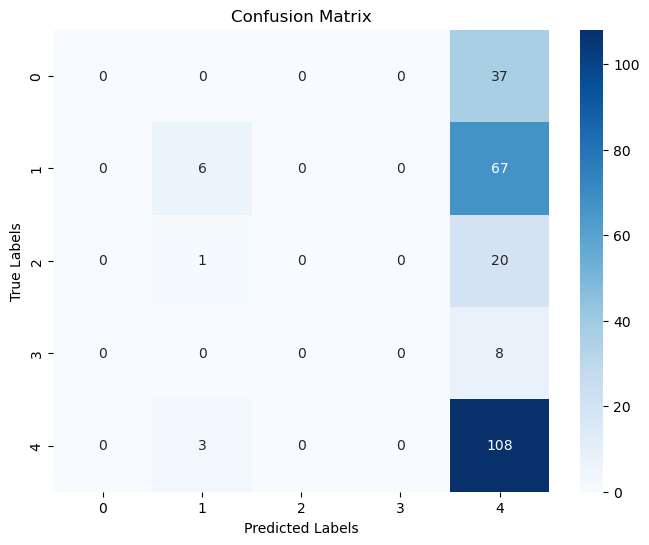

In [165]:
# Calculate the accuracy, F1 score, and confusion matrix
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f'Testing Accuracy with Feature Selection: {test_accuracy:.2f}')
print(f'Testing F1 Score with Feature Selection: {test_f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix tells us that this model really only does a good job predicting the subreddits 1 and 4. These categories are science and worldnews. This model does a great job predicting world news. This may be a result of the original dataset inclusing the most posts coming from the world news subreddit section.